In [1]:
# Write your imports here
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

In this lab, you'll be working with the Coffee Quality Index dataset, located [here](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). For convenience (and to save trouble in case you can't download files, or someone uploads a newer version), I've provided the dataset in the `data/` folder. The metadata (description) is at the Kaggle link. For this lab, you'll only need `merged_data_cleaned.csv`, as it is the concatenation of the other two datasets.

In this (and the following labs), you'll get several questions and problems. Do your analysis, describe it, use any tools and plots you wish, and answer. You can create any amount of cells you'd like.

Sometimes, the answers will not be unique, and they will depend on how you decide to approach and solve the problem. This is usual - we're doing science after all!

It's a good idea to save your clean dataset after all the work you've done to it.

### Problem 1. Read the dataset (1 point)
This should be self-explanatory. The first column is the index.

In [5]:
coffee_quality = pd.read_csv("data/merged_data_cleaned.csv")
coffee_quality

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 2. Observations and features (1 point)
How many observations are there? How many features? Which features are numerical, and which are categorical?

**Note:** Think about the _meaning_, not the data types. The dataset hasn't been thoroughly cleaned.

In [7]:
coffee_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1339 non-null   int64  
 1   Species                1339 non-null   object 
 2   Owner                  1332 non-null   object 
 3   Country.of.Origin      1338 non-null   object 
 4   Farm.Name              980 non-null    object 
 5   Lot.Number             276 non-null    object 
 6   Mill                   1021 non-null   object 
 7   ICO.Number             1180 non-null   object 
 8   Company                1130 non-null   object 
 9   Altitude               1113 non-null   object 
 10  Region                 1280 non-null   object 
 11  Producer               1107 non-null   object 
 12  Number.of.Bags         1339 non-null   int64  
 13  Bag.Weight             1339 non-null   object 
 14  In.Country.Partner     1339 non-null   object 
 15  Harv

We can see that the dataset has 1339 observations and 44 features. 16 features are of type float, 4 of type int and 24 of type object. **Numerical** features are ones that contain numerical values, such as *int* and *float* data types. **Categorical** features contain discrete values representing categories or groups. These can be strings or other types that are not used for numerical operations.

### Problem 3. Column manipulation (1 point)
Make the column names more Pythonic (which helps with the quality and... aesthetics). Convert column names to `snake_case`, i.e. `species`, `country_of_origin`, `ico_number`, etc. Try to not do it manually.

In [10]:
column_names = coffee_quality.columns.tolist() #Get a list of the columns
print("Column names: \n" + str(column_names))

lowercase_columns = [column.lower() for column in column_names] #Make all elements of the list lowercase
snake_case_columns = [column.replace(".", "_") for column in lowercase_columns] #Replace the dots with underscores
print("\nConverted columns:\n" + str(snake_case_columns))

Column names: 
['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers', 'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body', 'Certification.Address', 'Certification.Contact', 'unit_of_measurement', 'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters']

Converted columns:
['unnamed: 0', 'species', 'owner', 'country_of_origin', 'farm_name', 'lot_number', 'mill', 'ico_number', 'company', 'altitude', 'region', 'producer', 'number_of_bags', 'bag_weight', 'in_country_partner', 'harvest_year', 'grading_date', 'owner_1', 'variety', 'processing_method', 'aroma'

In [11]:
coffee_quality.columns = snake_case_columns
coffee_quality

,unnamed: 0,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 4. Bag weight (1 point)
What's up with the bag weights? Make all necessary changes to the column values. Don't forget to document your methods and assumptions.

The bag weights are currently strings, containing different measuring units. The measuring unit part must be cut from the string, so that the values can be converted to type *float*. There are *lbs* and *kg* values. The lbs ones will be converted to kg. There are also a few *kg,lbs* values, which I assume are an error, so I will take them as kg.

In [14]:
#First create a function that strips the weights from the measuring units text
def clean_bag_weights(weight):
    if " kg,lbs" in weight:
        return float(weight.replace(" kg,lbs", ""))
    if " lbs" in weight:
        weight_value = float(weight.replace(" lbs", "")) #Remove the lbs part and make the value a float
        return weight_value * 0.453592 #Convert lbs to kg
    if " kg" or " kg,lbs" in weight:
        return float(weight.replace(" kg", ""))
                     

coffee_quality.bag_weight = coffee_quality.bag_weight.apply(clean_bag_weights)

In [15]:
coffee_quality[['bag_weight']]

,bag_weight
0,60.00000
1,60.00000
2,1.00000
3,60.00000
4,60.00000
...,...
1334,2.00000
1335,2.00000
1336,1.00000
1337,2.26796


The column has been succesfully converted to a float type. Now let's change the column name to indicate that the weight is in kilograms.

In [17]:
coffee_quality.rename(columns={"bag_weight" : "bag_weight_kg"}, inplace = True)
coffee_quality[["bag_weight_kg"]]

,bag_weight_kg
0,60.00000
1,60.00000
2,1.00000
3,60.00000
4,60.00000
...,...
1334,2.00000
1335,2.00000
1336,1.00000
1337,2.26796


### Problem 5. Dates (1 point)
This should remind you of problem 4 but it's slightly nastier. Fix the harvest years, document the process.

While you're here, fix the expiration dates, and grading dates. Unlike the other column, these should be dates (`pd.to_datetime()` is your friend).

Currently the harvest years are not structured the same way. Some have months, some show a period of time, some are even missing an year. I want to clear the values, so that they only show the beginning year and remove everything else.

In [20]:
def clear_year(date):
    match = re.search(r'\b(\d{4})\b', date)
    if match:
        return match.group(1)
    return None

coffee_quality.harvest_year = coffee_quality.harvest_year.astype(str)
coffee_dates_cleaned = coffee_quality
coffee_dates_cleaned.harvest_year = coffee_dates_cleaned.harvest_year.apply(clear_year)

In [21]:
coffee_dates_cleaned[['harvest_year']]

,harvest_year
0,2014
1,2014
2,None
3,2014
4,2014
...,...
1334,2016
1335,2016
1336,2014
1337,2013


Now lets also fix grading dates and expiration dates too by using the **pd.to_datetime**.

In [23]:
coffee_dates_cleaned.grading_date = pd.to_datetime(coffee_dates_cleaned.grading_date, format = "mixed")
coffee_dates_cleaned.expiration = pd.to_datetime(coffee_dates_cleaned.expiration, format = "mixed")

coffee_dates_cleaned[["grading_date", "expiration"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   grading_date  1339 non-null   datetime64[ns]
 1   expiration    1339 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 21.1 KB


The columns have been succesfully transformed into datetime64.

In [25]:
coffee_quality = coffee_dates_cleaned

### Problem 6. Countries (1 point)
How many coffees are there with unknown countries of origin? What can you do about them?

In [27]:
na_vals = coffee_quality.country_of_origin.isna().sum()
na_vals

1

There is only one missing value. Let's fill it with a string "unknown"

In [29]:
coffee_quality.country_of_origin = coffee_quality["country_of_origin"].fillna("Unknown")
coffee_quality[coffee_quality.country_of_origin == "Unknown"] #Now the country of origin displays "Unknown"

,unnamed: 0,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1197,1197,Arabica,racafe & cia s.c.a,Unknown,NaN,NaN,NaN,3-37-1980,NaN,NaN,...,NaN,3,2012-02-29,Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN


### Problem 7. Owners (1 point)
There are two suspicious columns, named `Owner`, and `Owner.1` (they're likely called something different after you solved problem 3). Do something about them. Is there any link to `Producer`?

The Owner and Owner.1 columns are the same, except that the Owner names are not capitalized. I will drop the Owner column and keep only the Owner.1 column and also remove the ".1" from the name.

In [32]:
coffee_quality = coffee_quality.drop("owner", axis = 1)

In [33]:
coffee_quality = coffee_quality.rename(columns = {"owner_1" : "owner"})
coffee_quality.owner

0                      metad plc
1                      metad plc
2       Grounds for Health Admin
3            Yidnekachew Dabessa
4                      metad plc
                  ...           
1334                 Luis Robles
1335                 Luis Robles
1336                 James Moore
1337               Cafe Politico
1338               Cafe Politico
Name: owner, Length: 1339, dtype: object

There is a connection between **producer** and **owner** columns, because some owners are also the producers. There are missing values in **producer**, which leads me to believe that the producer is again also the owner, so I will fill them with the corresponding values.

In [35]:
print(coffee_quality.producer.isna().sum())

232


In [36]:
coffee_quality.producer = coffee_quality.producer.fillna(coffee_quality.owner)
print(coffee_quality.producer.isna().sum())
coffee_quality[["producer"]]

0


,producer
0,METAD PLC
1,METAD PLC
2,Grounds for Health Admin
3,Yidnekachew Dabessa Coffee Plantation
4,METAD PLC
...,...
1334,Café Robusta del Ecuador S.A.
1335,Café Robusta del Ecuador S.A.
1336,Cafe Cazengo
1337,Cafe Politico


Now there are no missing values in the **Producer** column.

### Problem 8. Coffee color by country and continent (1 point)
Create a table which shows how many coffees of each color are there in every country. Leave the missing values as they are.

**Note:** If you ask me, countries should be in rows, I prefer long tables much better than wide ones.

Now do the same for continents. You know what continent each country is located in.

In [39]:
country_color = coffee_quality.pivot_table(
    index = "country_of_origin",
    columns = "color",
    aggfunc = "size",
    fill_value = 0
)

country_color

color,Blue-Green,Bluish-Green,Green
country_of_origin,,,
Brazil,14,12,92
Burundi,0,0,1
China,0,0,16
Colombia,8,8,118
Costa Rica,10,9,28
Cote d?Ivoire,0,1,0
Ecuador,2,1,0
El Salvador,2,2,9
Ethiopia,0,2,15


### Problem 9. Ratings (1 point)
The columns `Aroma`, `Flavor`, etc., up to `Moisture` represent subjective ratings. Explore them. Show the means and range; draw histograms and / or boxplots as needed. You can even try correlations if you want. What's up with all those ratings?

In [41]:
coffee_ratings = coffee_quality.loc[:, "aroma":"moisture"] #create a subset of only the desired columns
coffee_ratings

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture
0,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12
1,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12
2,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00
3,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11
4,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...
1334,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00
1335,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00
1336,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00
1337,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08,0.10


In [42]:
coffee_ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
aroma,1339.0,7.566706,0.377560,0.0,7.42,7.58,7.75,8.75
flavor,1339.0,7.520426,0.398442,0.0,7.33,7.58,7.75,8.83
aftertaste,1339.0,7.401083,0.404463,0.0,7.25,7.42,7.58,8.67
acidity,1339.0,7.535706,0.379827,0.0,7.33,7.58,7.75,8.75
body,1339.0,7.517498,0.370064,0.0,7.33,7.50,7.67,8.58
balance,1339.0,7.518013,0.408943,0.0,7.33,7.50,7.75,8.75
uniformity,1339.0,9.834877,0.554591,0.0,10.00,10.00,10.00,10.00
clean_cup,1339.0,9.835108,0.763946,0.0,10.00,10.00,10.00,10.00
sweetness,1339.0,9.856692,0.616102,0.0,10.00,10.00,10.00,10.00
cupper_points,1339.0,7.503376,0.473464,0.0,7.25,7.50,7.75,10.00


I will generate a list of the columns names, then create subplots to display a histogram of each column.

['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points', 'moisture']


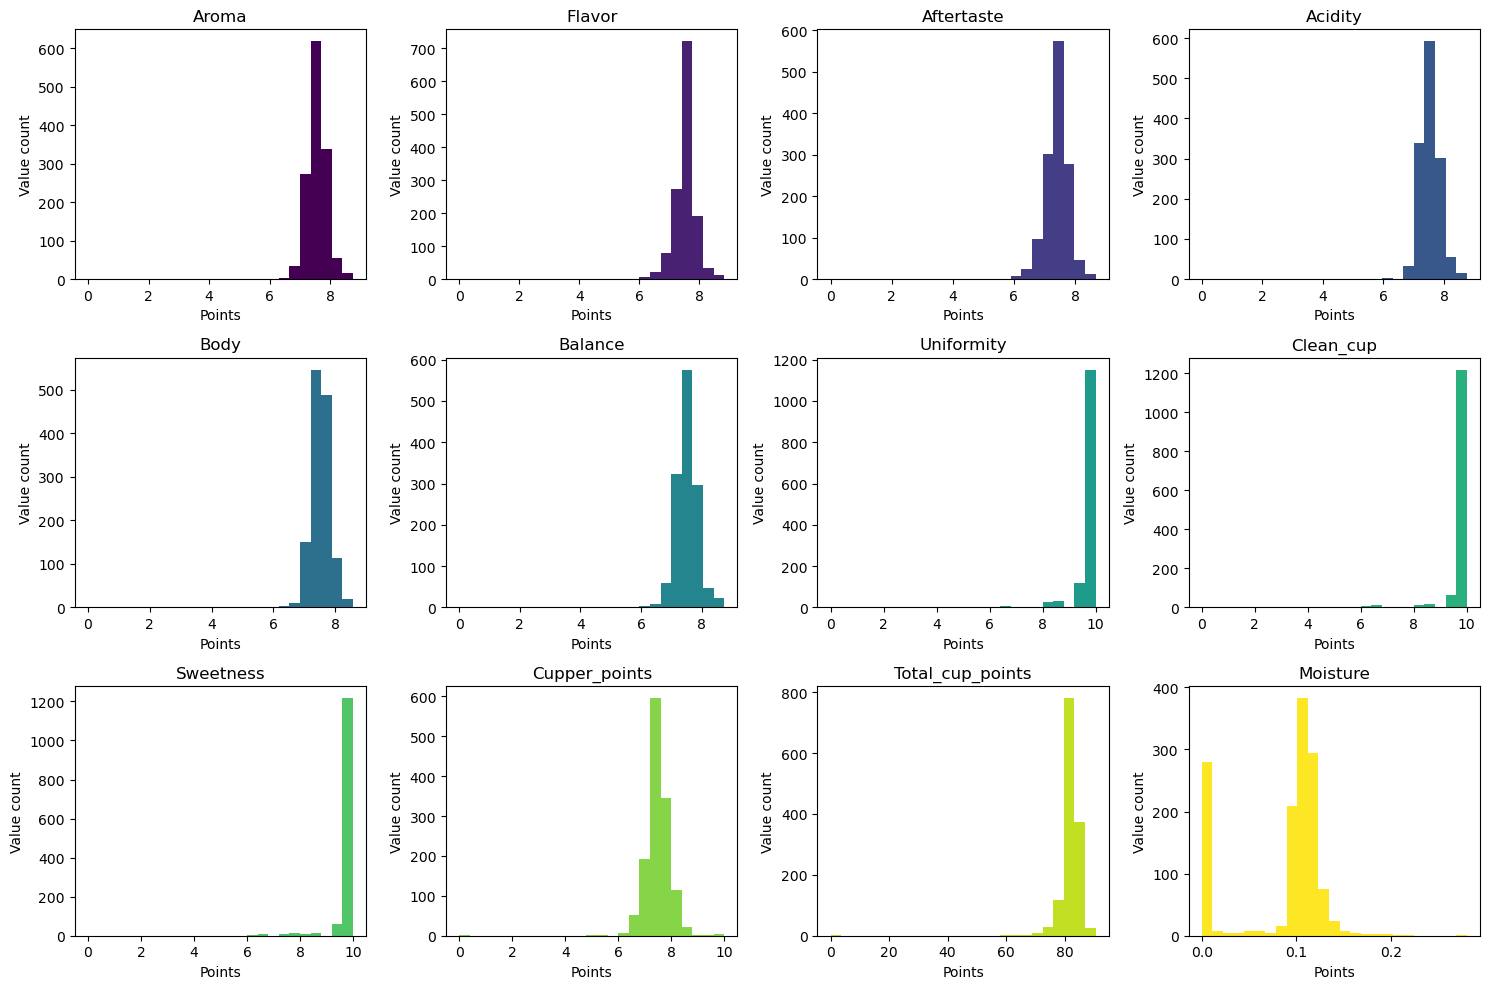

In [44]:
columns = coffee_ratings.columns.tolist()
print(columns)
colors = colors = plt.cm.viridis(np.linspace(0, 1, len(columns))) #Generates 12 colors from 'viridis' colormap
column_color = zip(columns, colors)

fig, axes = plt.subplots(3, 4, figsize = (15,10))
axes = axes.flatten() #For easier iteration


for i, (column, color) in enumerate(column_color):
    axes[i].hist(coffee_ratings[column], color = color, bins = 25)
    axes[i].set_title(column.capitalize())
    axes[i].set_xlabel('Points')
    axes[i].set_ylabel('Value count')

plt.tight_layout()
plt.show()

Let's also display the means of each column in a scatter plot, except the total cup points, because it's value is too high compared to each separate column.

In [46]:
column_means = coffee_ratings.drop("total_cup_points", axis = 1).mean()
column_dict = dict(sorted(column_means.items(), key=lambda item: item[1], reverse = True))
print(column_dict)

{'sweetness': 9.856691560866318, 'clean_cup': 9.835108289768483, 'uniformity': 9.834876773711727, 'aroma': 7.566706497386109, 'acidity': 7.535705750560121, 'flavor': 7.520425690814041, 'balance': 7.5180134428678125, 'body': 7.517498132935026, 'cupper_points': 7.503375653472741, 'aftertaste': 7.40108289768484, 'moisture': 0.08837938760268857}


<BarContainer object of 11 artists>

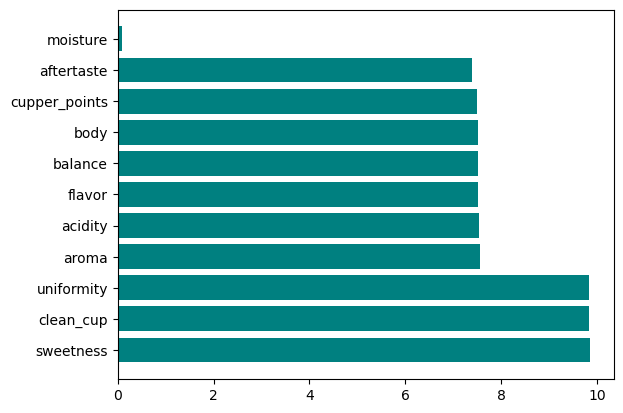

In [47]:
plt.barh(list(column_dict.keys()), list(column_dict.values()), color = "teal")

We can see that people almost always gave maximum points to uniformity, clean cup and sweetness, around 8% for moisture and around 7.5 points for the rest. 

### Problem 10. High-level errors (1 point)
Check the countries against region names, altitudes, and companies. Are there any discrepancies (e.g. human errors, like a region not matching the country)? Take a look at the (cleaned) altitudes; there has been a lot of preprocessing done to them. Was it done correctly?

In [50]:
coffee_quality[["country_of_origin", "region", "altitude", "company"]].sample(10)

,country_of_origin,region,altitude,company
868,Colombia,huila,1750 msnm,exportadora de cafe condor s.a
407,Peru,NaN,NaN,sustainable harvest
427,Guatemala,antigua,1500 msnm,"siembras vision, s.a."
672,United States (Hawaii),kona,NaN,cqi
539,Philippines,"bukidnon, mindanao, philppines",1200 masl,hineleban foundation
58,Guatemala,nuevo oriente,4650,unicafe
1145,Taiwan,"taiwu township , pingtung county 屏東縣泰武鄉",800-1200,"red on tree co., ltd."
990,"Tanzania, United Republic Of","iwala village, mbeya rural",1456,taylor winch (t) ltd
882,Honduras,comayagua,1400,cigrah
1122,Nicaragua,jinotega,1250,"comercial internacional exportadora, s.a."


### * Problem 11. Clean and explore at will
The dataset claimed to be clean, but we were able to discover a lot of things to fix and do better.

Play around with the data as much as you wish, and if you find variables to tidy up and clean - by all means, do that!

In [52]:
#Lets drop the "unnamed: 0" column, which is just a repetition of the index and doesn't provide any information.
coffee_quality = coffee_quality.drop('unnamed: 0', axis = 1)
coffee_quality

,species,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,producer,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,...,Green,0,2016-04-03,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,...,Green,1,2016-04-03,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,Grounds for Health Admin,...,NaN,0,2011-05-31,Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,...,Green,2,2016-03-25,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,...,Green,2,2016-04-03,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,"san juan, playas",Café Robusta del Ecuador S.A.,...,Blue-Green,1,2017-01-18,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,Robusta,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,"san juan, playas",Café Robusta del Ecuador S.A.,...,Blue-Green,0,2017-01-18,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,Robusta,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,"kwanza norte province, angola",Cafe Cazengo,...,NaN,6,2015-12-23,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,Robusta,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,NaN,Cafe Politico,...,Green,1,2015-08-25,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
